### Exploratory Analysis ###

In [253]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [254]:
data = pd.read_csv("hot-100-current.csv")
data.head()

,chart_week,current_week,title,performer,last_week,peak_pos,wks_on_chart
0,2022-01-01,1,All I Want For Christmas Is You,Mariah Carey,1.0,1,50
1,2022-01-01,2,Rockin' Around The Christmas Tree,Brenda Lee,2.0,2,44
2,2022-01-01,3,Jingle Bell Rock,Bobby Helms,4.0,3,41
3,2022-01-01,4,A Holly Jolly Christmas,Burl Ives,5.0,4,25
4,2022-01-01,5,Easy On Me,Adele,3.0,1,11


In [255]:
data["chart_week"] = pd.to_datetime(data["chart_week"])
pivot = data.pivot_table(
    index=['title', 'performer'],
    columns='chart_week',
    values='current_week'
)

Text(0.5, 0, '# of Weeks')

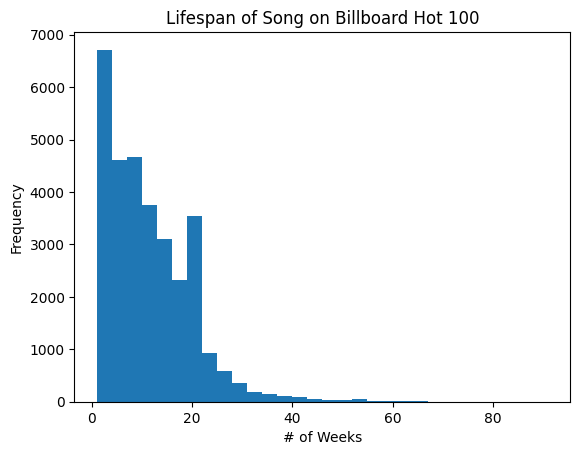

In [256]:
weeks_on_chart = pivot.notna().sum(axis=1)

# Add it as a new column in the pivot table (optional)
pivot["total_weeks_on_chart"] = weeks_on_chart

# Show result
pivot["total_weeks_on_chart"].plot(kind="hist",
                                   bins=30)
plt.title("Lifespan of Song on Billboard Hot 100")
plt.xlabel("# of Weeks")

In [257]:
bob = pivot[
    pivot.index.get_level_values("performer").str.contains("bob dylan", case=False)
]
bob = bob.drop(columns="total_weeks_on_chart")

aligned = {}

for (title, performer), row in bob.iterrows():

    # Drop weeks where the song wasn't on the chart
    track = row.dropna().sort_index()
    
    # Re-number from 1 to N
    track.index = range(1, len(track) + 1)
    
    aligned[(title, performer)] = track

aligned_df = pd.DataFrame(aligned)

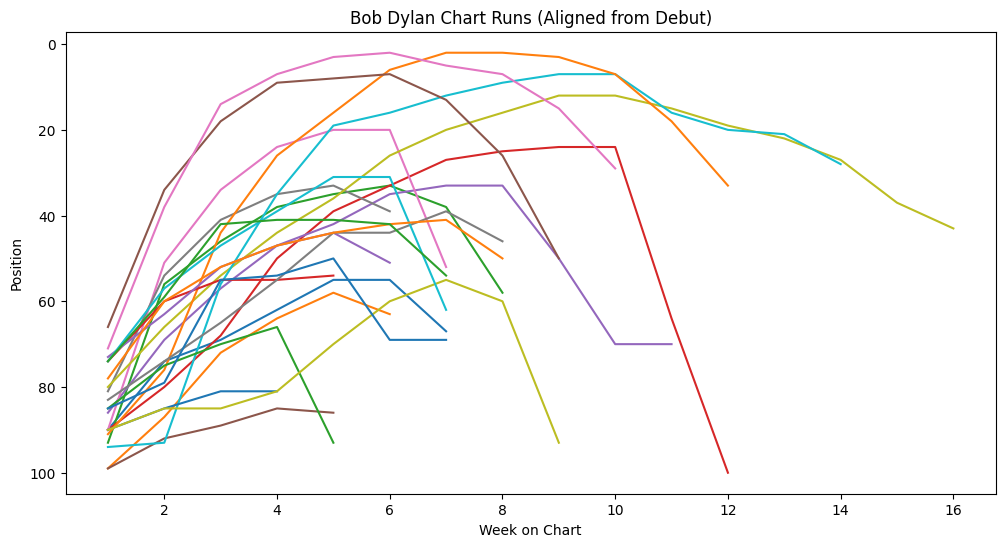

In [258]:
plt.figure(figsize=(12, 6))

for col in aligned_df:
    plt.plot(aligned_df.index, aligned_df[col], label=col[0])  # just title

plt.gca().invert_yaxis()
plt.title("Bob Dylan Chart Runs (Aligned from Debut)")
plt.xlabel("Week on Chart")
plt.ylabel("Position")
# plt.legend()
plt.show()